Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 6.2 MB/s eta 0:00:00


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


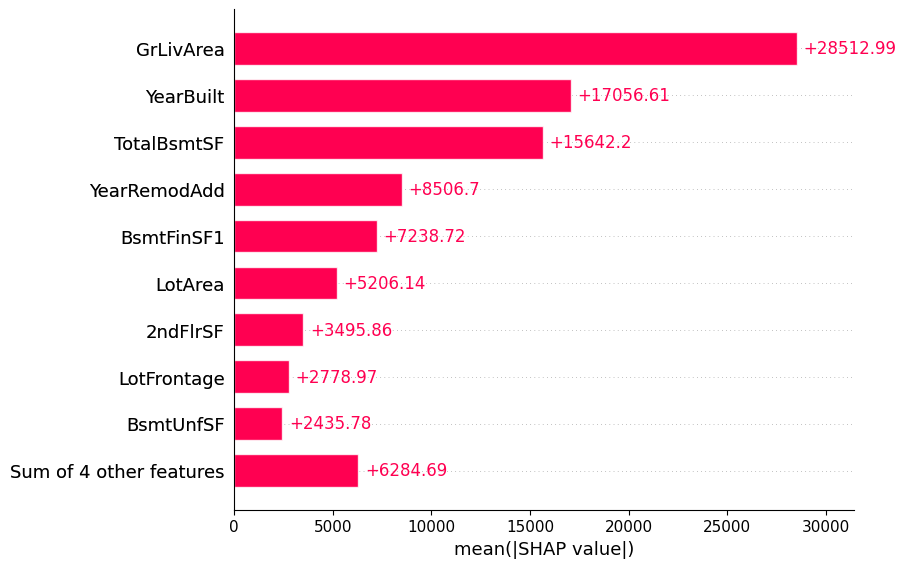

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


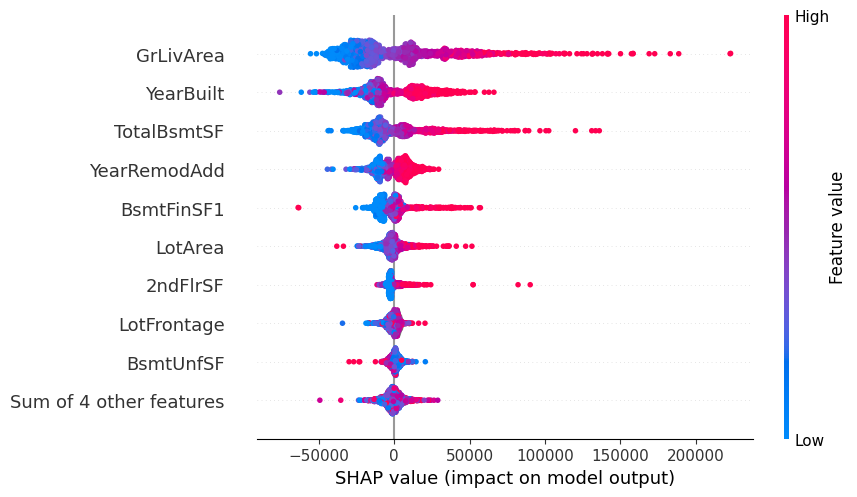

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


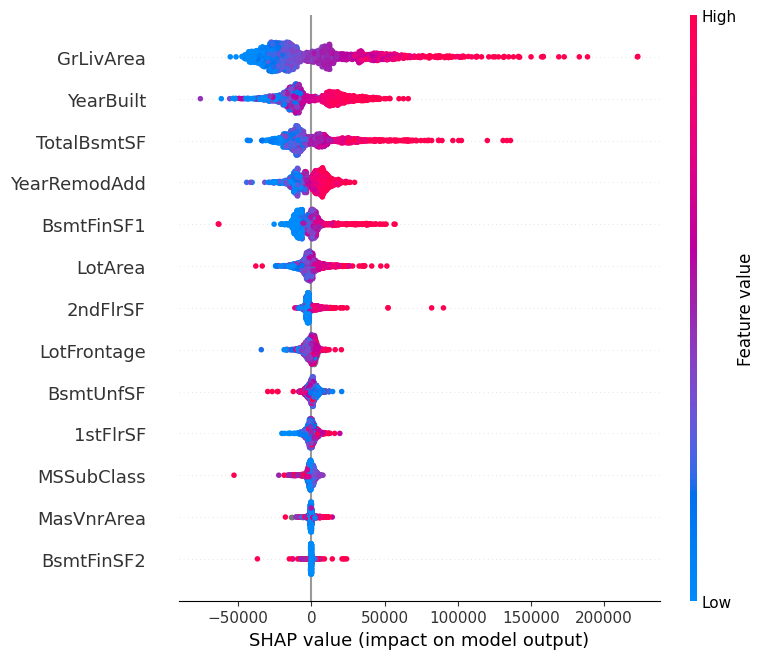

(1460, 13, 13)
Model prediction: 207406.484375
Mean prediction + interaction values: 207406.515625


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'MSSubClass'),
  Text(0, 1.5, 'LotFrontage'),
  Text(0, 2.5, 'LotArea'),
  Text(0, 3.5, 'YearBuilt'),
  Text(0, 4.5, 'YearRemodAdd'),
  Text(0, 5.5, 'MasVnrArea'),
  Text(0, 6.5, 'BsmtFinSF1'),
  Text(0, 7.5, 'BsmtFinSF2'),
  Text(0, 8.5, 'BsmtUnfSF'),
  Text(0, 9.5, 'TotalBsmtSF'),
  Text(0, 10.5, '1stFlrSF'),
  Text(0, 11.5, '2ndFlrSF'),
  Text(0, 12.5, 'GrLivArea')])

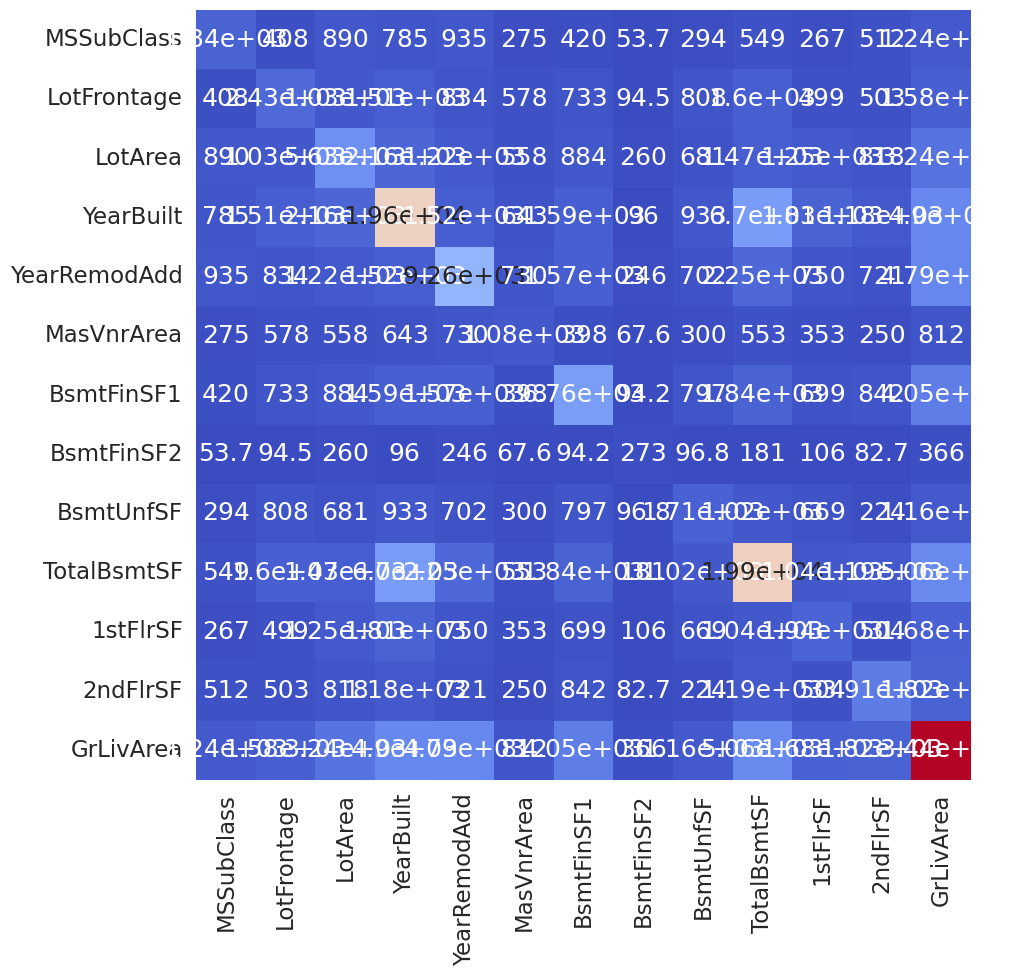

In [2]:
import xgboost as xgb
import numpy as np
import seaborn as sns
!pip install --upgrade shap
import matplotlib.pyplot as plt
import shap
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the CSV file into a pandas DataFrame
train = pd.read_csv("/content/drive/MyDrive/CS 301/house-prices-advanced-regression-techniques/train.csv")

# Split the data into X (features) and y (target) 
X = train[["MSSubClass", "LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"]]

y = train[["SalePrice"]]

model = xgb.XGBRegressor().fit(X, y)

# Create an explainer object using the XGBoost model
explainer = shap.Explainer(model)

# Generate SHAP values for your dataset
shap_values = explainer(X)

# Plot the SHAP values for the features in your dataset
shap.plots.bar(shap_values)

shap.plots.beeswarm(shap_values)

shap.summary_plot(shap_values)

explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)
print(np.shape(shap_interaction))

# SHAP interaction values for first employee
pd.DataFrame(shap_interaction[0],index=X.columns,columns=X.columns)
y_pred = model.predict(X)

#Calculate mean prediction 
mean_pred = np.mean(y_pred)

#Sum of interaction values for first employee
sum_shap = np.sum(shap_interaction[0])

#Values below should be the same
print("Model prediction: {}".format(y_pred[0]))
print("Mean prediction + interaction values: {}".format(mean_pred+sum_shap))
#Get absolute mean of matrices
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)

#times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

#display 
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0) 